In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.inspection import permutation_importance

import shap

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Preprocessing and Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
columns = [
    'Age_band', 'Edu_level', 'Sex_F', 'Sex_M', 'Relation_Employee',
    'Relation_Other', 'Relation_Owner', 'Exp_1-2yr', 'Exp_2-5yr', 'Exp_5-10yr',
    'Exp_10yr+', 'Exp_<1yr', 'Exp_No_Licence', 'Exp_Unknown', 'Lanes_Double_carriageway',
    'Lanes_One_way', 'Lanes_Two-way_broken', 'Lanes_Two-way_solid', 'Lanes_Undivided',
    'Lanes_other', 'Junction_Crossing', 'Junction_None', 'Junction_O_Shape', 'Junction_Other',
    'Junction_T_Shape', 'Junction_X_Shape', 'Junction_Y_Shape', 'Surface_Asphalt',
    'Surface_Asphalt_distress', 'Surface_Earth', 'Surface_Gravel', 'Surface_Other',
    'Light_Dark_lit', 'Light_Dark_unlit', 'Light_Dark_none', 'Light_Daylight',
    'Weather_Cloudy', 'Weather_Fog', 'Weather_Normal', 'Weather_Other', 'Weather_Rain',
    'Weather_Rain_Wind', 'Weather_Snow', 'Weather_Windy', 'Collision_Animal',
    'Collision_Pedestrian', 'Collision_Roadside_obj', 'Collision_Roadside_parked',
    'Collision_Fall', 'Collision_Other', 'Collision_Rollover', 'Collision_Vehicle',
    'Collision_Train', 'Movement_Entering_junction', 'Movement_Getting_off', 'Movement_Straight',
    'Movement_Backward', 'Movement_Other', 'Movement_Overtaking', 'Movement_Parked',
    'Movement_Reversing', 'Movement_Stopping', 'Movement_Turnover', 'Movement_U-Turn',
    'Movement_Waiting', 'Pedestrian_Cross_nearside', 'Pedestrian_Cross_nearside_masked',
    'Pedestrian_Cross_offside_masked', 'Pedestrian_Standing', 'Pedestrian_Standing_masked',
    'Pedestrian_None', 'Pedestrian_Unknown', 'Pedestrian_Walk_back_traffic', 'Pedestrian_Walk_facing_traffic',
    'Cause_Lane_left', 'Cause_Lane_right', 'Cause_High_speed', 'Cause_Careless', 'Cause_Left',
    'Cause_Drugs', 'Cause_Drunk', 'Cause_Improper_getting_off', 'Cause_Improper_parking',
    'Cause_Backward', 'Cause_No_distancing', 'Cause_No_priority_pedestrian', 'Cause_No_priority_vehicle',
    'Cause_Other', 'Cause_Overloading', 'Cause_Overspeed', 'Cause_Overtaking', 'Cause_Overturning',
    'Cause_Turnover', "Accident_severity"
]

# Loading the oversampled data

In [3]:
data_train = pd.read_csv("../data/interim/oversampled_train.csv")
data_test = pd.read_csv('../data/interim/oversampled_test.csv')

In [4]:
data_train.columns =  columns
data_test.columns =  columns

In [5]:
categorical_cols = ['Age_band', 'Edu_level']
data_train= pd.get_dummies(data_train, columns=categorical_cols).astype(int)
data_test = pd.get_dummies(data_test, columns=categorical_cols).astype(int)

In [6]:
X_train = data_train.drop(columns='Accident_severity')
y_train = data_train.Accident_severity

X_test = data_test.drop(columns='Accident_severity')
y_test = data_test.Accident_severity

# Training the balanced random forest

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the Random Forest Classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjust the average parameter as needed

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.9583604424202993
F1 Score: 0.9572657683853507


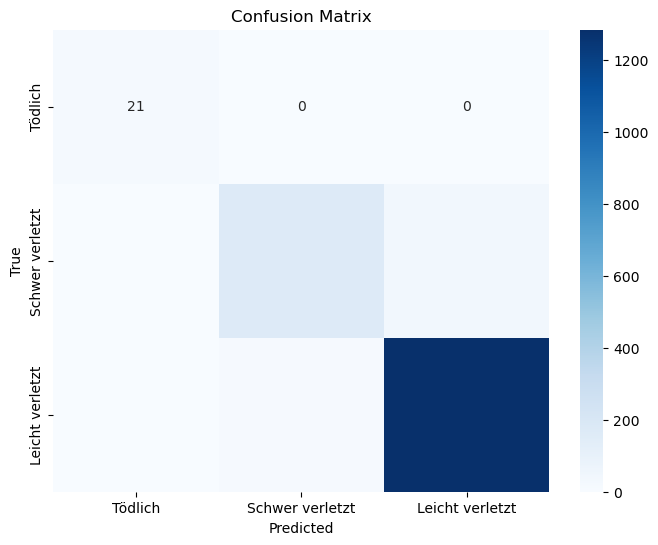

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Tödlich', 'Schwer verletzt', 'Leicht verletzt']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Shap Value Analysis

In [11]:
# Initialize the SHAP explainer with your random forest classifier
explainer = shap.TreeExplainer(rf_classifier)
# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

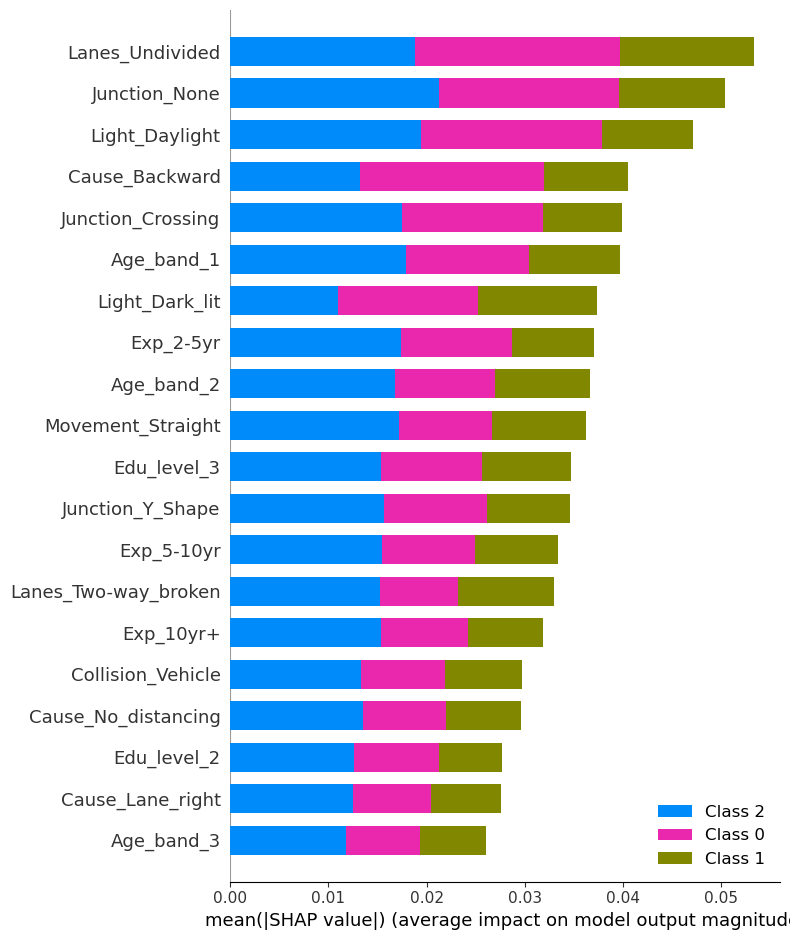

In [12]:
shap.summary_plot(shap_values, X_test)

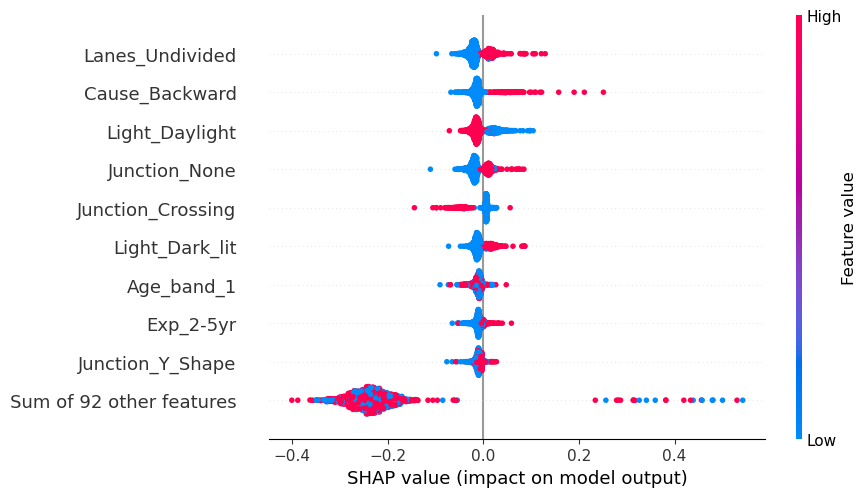

In [13]:
shap_values_exp = shap.Explanation(shap_values[0], data=X_test)

# Plot the beeswarm
shap.plots.beeswarm(shap_values_exp)

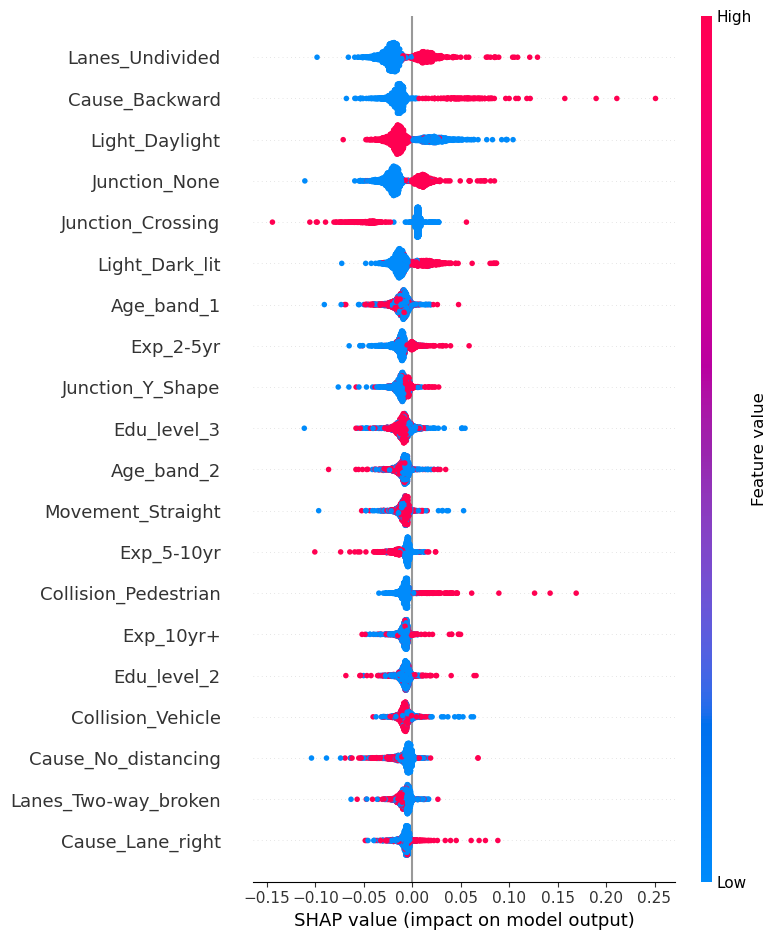

In [14]:
shap.summary_plot(shap_values[0], X_test)